<a href="https://colab.research.google.com/github/ksong1009/capstone/blob/main/Charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

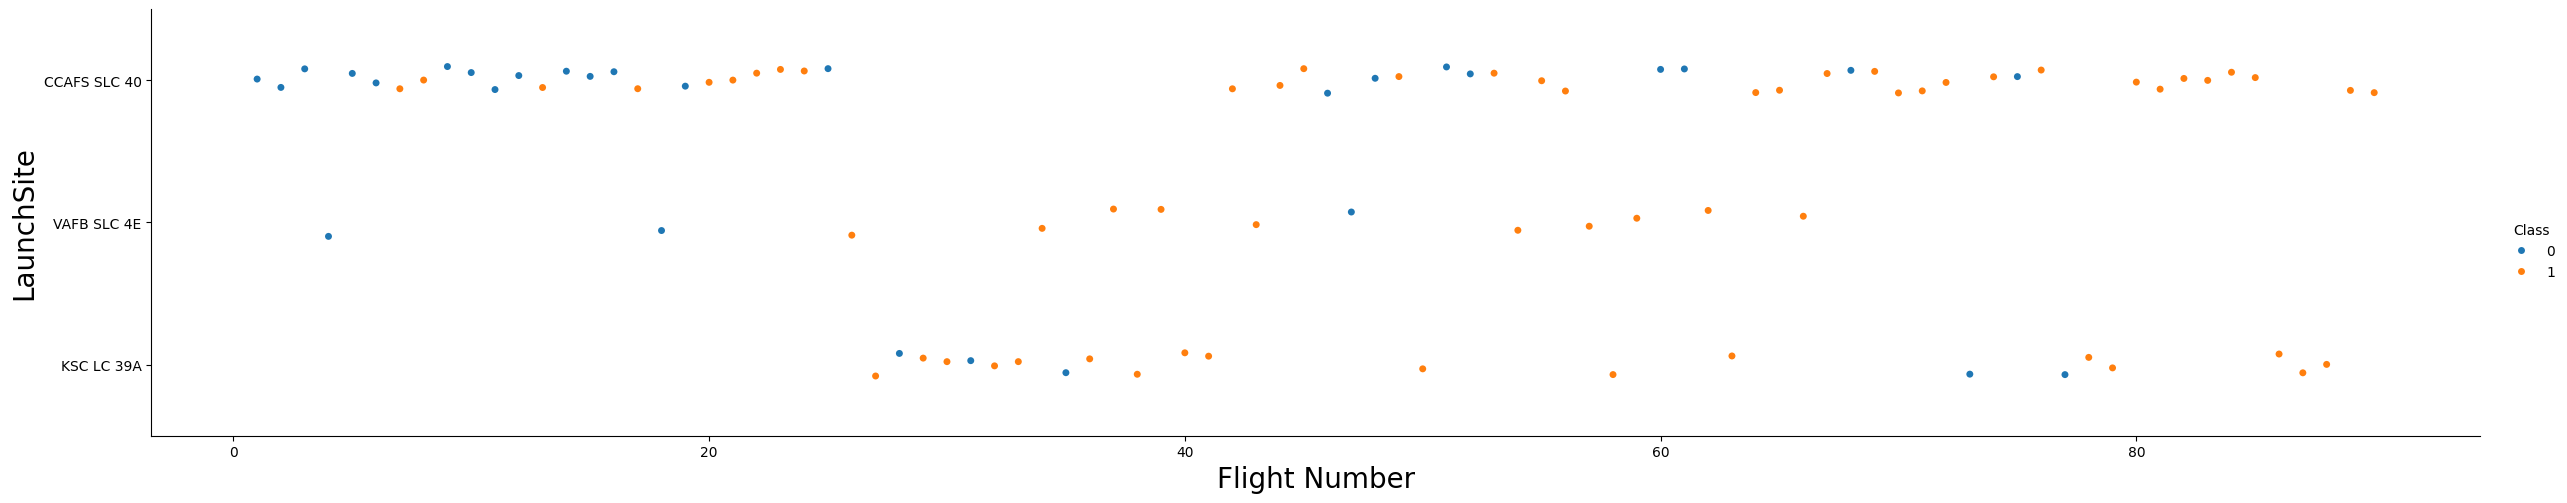

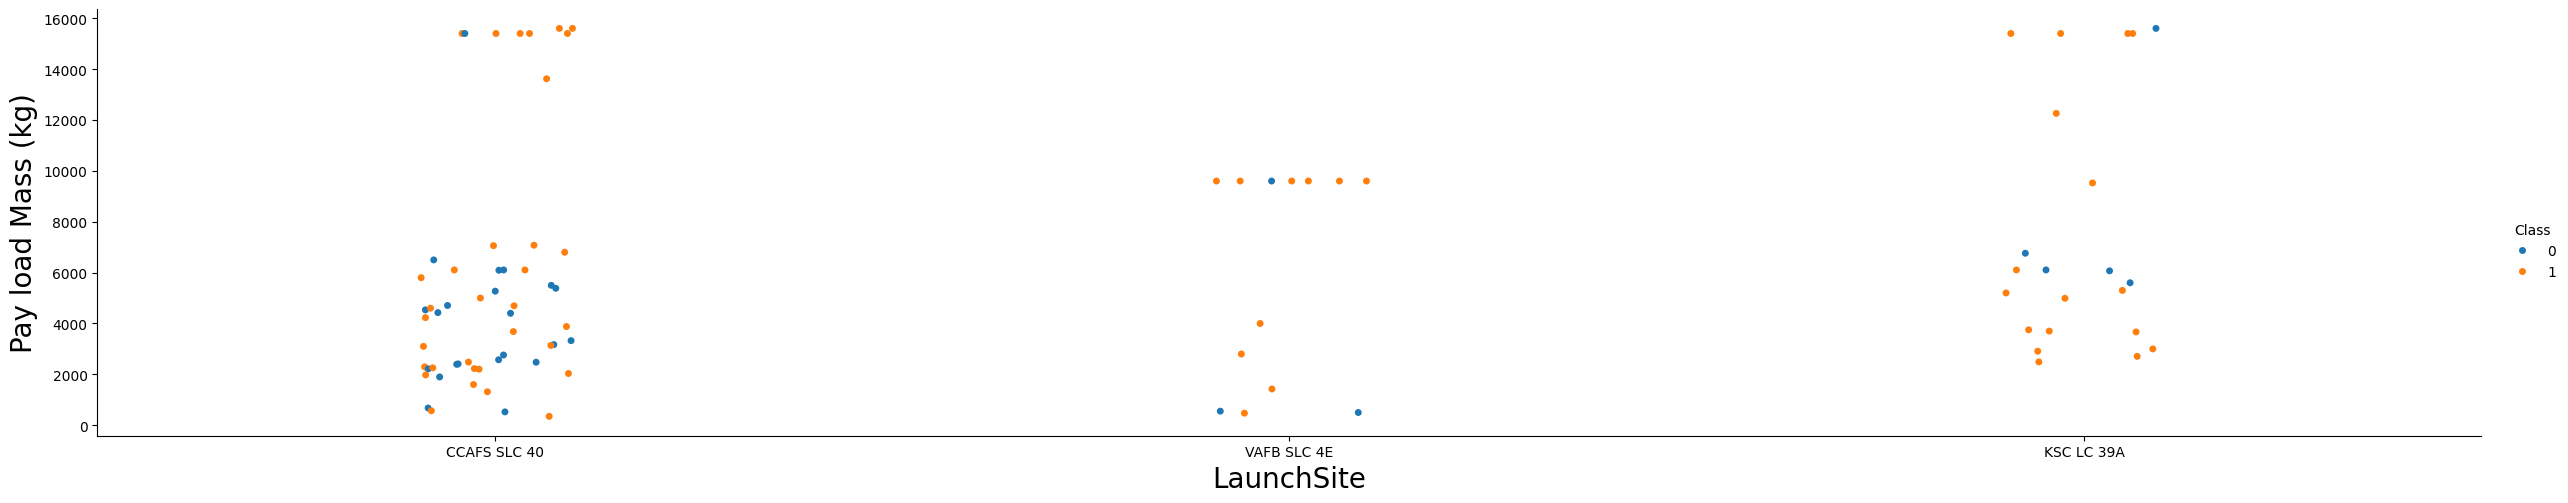

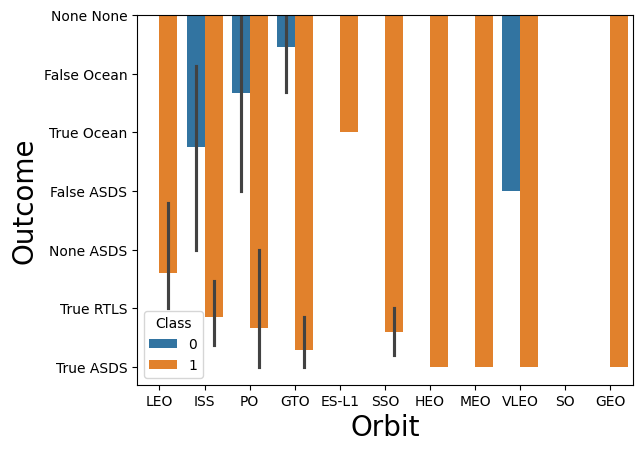

<Figure size 1000x600 with 0 Axes>

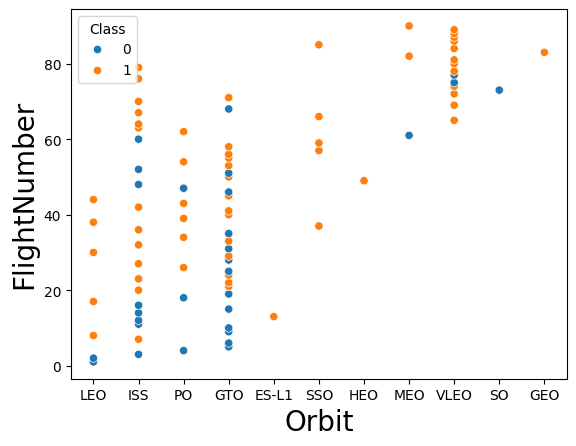

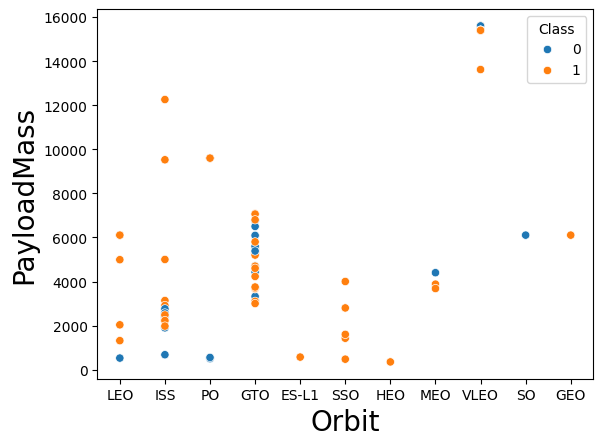

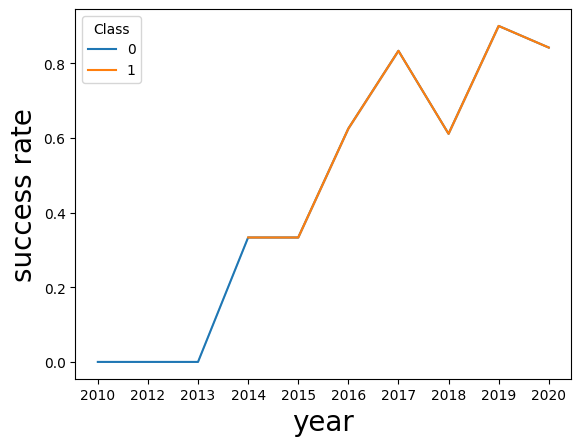

In [ ]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

# Instead of 'from js import fetch', use the following for fetching data in Python
import requests
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
# Use requests.get to fetch the data
resp = requests.get(URL)
# Read the content of the response into a BytesIO object
dataset_part_2_csv = io.BytesIO(resp.content)
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

#sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
#plt.xlabel("Flight Number",fontsize=20)
#plt.ylabel("Pay load Mass (kg)",fontsize=20)
#plt.show()

#TASK 1: Visualize the relationship between Flight Number and Launch Site
##Use the function catplot to plot FlightNumber vs LaunchSite, set the parameter x parameter to FlightNumber,set the y to Launch Site and set the parameter hue to 'class'

sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()
## interpretation: different flight number ranges have launch site preference

#TASK 2: Visualize the relationship between Payload Mass and Launch Site
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("LaunchSite",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

#TASK 3: Visualize the relationship between success rate of each orbit type
##Next, we want to visually check if there are any relationship between success rate and orbit type.

##Let's create a bar chart for the sucess rate of each orbit
dataset_part_2_csv = io.BytesIO(resp.content)
df=pd.read_csv(dataset_part_2_csv)
df.head(19)

#TASK 3: Visualize the relationship between success rate of each orbit type
# Replace 'orbit' with the correct column name from your dataset, for example 'Orbit'
# Replace 'outcome' with 'Class' which represents the success of the launch
# Remove the 'aspect' parameter, as it's not supported by sns.barplot
sns.barplot(y="Outcome", x="Orbit", hue="Class", data=df)  # Assuming the column name is 'Orbit'
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Outcome",fontsize=20) # You can change this label to "Success" or "Class"

# Adjust the figure size using matplotlib.pyplot if needed
plt.figure(figsize=(10, 6))  # Adjust width and height as desired

plt.show()

#TASK 4: Visualize the relationship between FlightNumber and Orbit type
#Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.scatterplot(y="FlightNumber", x="Orbit", hue="Class", data=df)  # Assuming the column name is 'Orbit'
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("FlightNumber",fontsize=20)
plt.show()

#TASK 5: Visualize the relationship between Payload Mass and Orbit type
sns.scatterplot(y="PayloadMass", x="Orbit", hue="Class", data=df)  # Assuming the column name is 'Orbit'
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("PayloadMass",fontsize=20)
plt.show()

#TASK 6: Visualize the launch success yearly trend
# A function to Extract years from the date

year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['year'] = year
# calculate success rate for each year and add it as a new column
# group data by year and calculate success rate
success_rate_by_year = df.groupby('year')['Class'].mean().reset_index()
success_rate_by_year.rename(columns={'Class': 'success_rate'}, inplace=True)

# merge the success rate data back into the original dataframe
df = pd.merge(df, success_rate_by_year, on='year', how='left')

# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
sns.lineplot(y="success_rate", x="year", hue="Class", data=df)
plt.xlabel("year",fontsize=20)
plt.ylabel("success rate",fontsize=20)
plt.show()

features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

#TASK 7: Create dummy variables to categorical columns
#Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. Assign the value to the variable features_one_hot, display the results using the method head. Your result dataframe must include all features including the encoded ones.
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

## HINT: Use get_dummies() function on the categorical columns

# TASK 8: Cast all numeric columns to float64
features_one_hot.dtypes

#Now that our features_one_hot dataframe only contains numbers, cast the entire dataframe to variable type float64
features_one_hot = features_one_hot.astype('float64')
features_one_hot.dtypes

features_one_hot.to_csv('dataset_part_3.csv', index=False)

